Plots for Figures:
  * 7-19
  * 24-27
  * Appendix

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import itertools

In [7]:
fs_title = 20
fs_label = 14
fs_legend = 12

In [1]:
# Network name for plotting
# lenet-5, shufflenet-v2, inception-v3, densenet-121, squeezenet
fname='inception-v3'

In [2]:
# Set your path to the folder containing the .csv files
PATH = f'../benchmarks/results/{fname}/'
# Fetch all files in path
fileNames = os.listdir(os.path.abspath(PATH))

# Filter file name list for files ending with .csv
fileNames = [file for file in fileNames if f'_{fname}_' in file and '.csv' in file]

In [3]:
print(fileNames)

['fashion-mnist_inception-v3_relu_1592518997.csv', 'fashion-mnist_inception-v3_sigmoid_1592607346.csv', 'fashion-mnist_inception-v3_squashing-nl_1592336786.csv', 'fashion-mnist_inception-v3_squashing_1594012002.csv', 'fashion-mnist_inception-v3_tanh_1594033151.csv']


## Plot Epoch:Train accuracy and Epoch:Test accuracy

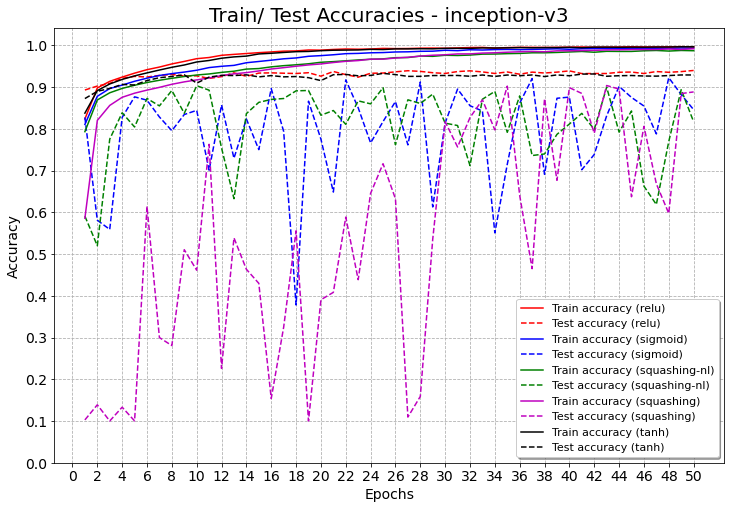

In [15]:
plt.figure(figsize=(12,8))

# Set colors for plot lines
colors_ = ['r','b','g','m','k']

# Loop over all files
for file, c in zip(fileNames, itertools.cycle(colors_)):
    
    ### Read .csv file and append to list
    model = pd.read_csv(PATH + file, index_col = 0)
    activation = file.split('_', 4)
    
    plt.plot(model['Epoch'], model['Train accuracy'],f'{c}-', label=f'Train accuracy ({activation[2]})')
    plt.plot(model['Epoch'], model['Test accuracy'],f'{c}--', label=f'Test accuracy ({activation[2]})')
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.xticks(np.arange(0, 51, step=2))
    
    #position of the legend outside of the graph
    plt.legend(bbox_to_anchor=(1, 1))

### Generate the plot
plt.title(f"Train/ Test Accuracies - {fname}", fontsize=fs_title)
plt.xlabel("Epochs", fontsize=fs_label)
plt.xticks(fontsize=fs_label)
plt.ylabel("Accuracy", fontsize=fs_label)
plt.yticks(fontsize=fs_label)
plt.grid(True, axis='both', linestyle='--')

plt.legend(loc='lower right', ncol=1, fancybox=True, shadow=True, fontsize=11)
plt.show()

## Plot Epoch:Train loss and Epoch:Test loss

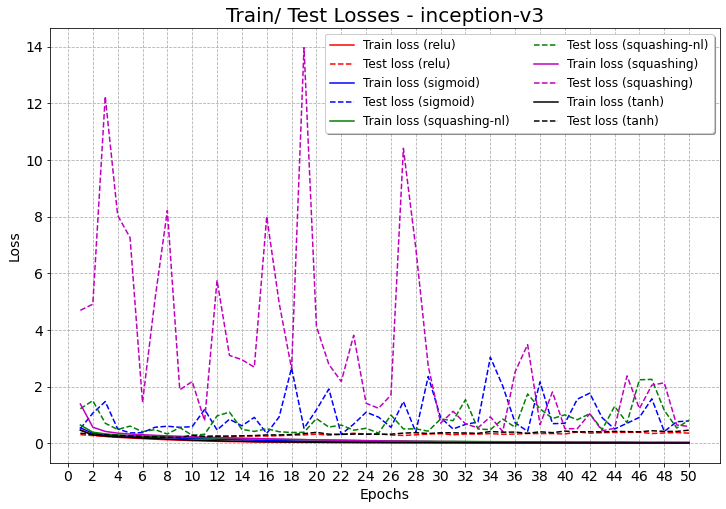

In [17]:
plt.figure(figsize=(12,8))

# Set colors for plot lines
colors_ = ['r','b','g','m','k']

# Loop over all files
for file, c in zip(fileNames, itertools.cycle(colors_)):
    
    ### Read .csv file and append to list
    model = pd.read_csv(PATH + file, index_col = 0)
    activation = file.split('_', 4)
    
    plt.plot(model['Epoch'], model['Train loss'],f'{c}-', label=f'Train loss ({activation[2]})')
    plt.plot(model['Epoch'], model['Test loss'],f'{c}--', label=f'Test loss ({activation[2]})')
    #plt.yticks(np.arange(0, 2, step=0.1))
    plt.xticks(np.arange(0, 51, step=2))


    #position of the legend outside of the graph
    plt.legend(bbox_to_anchor=(1, 1))

### Generate the plot
plt.title(f"Train/ Test Losses - {fname}", fontsize=fs_title)
plt.xlabel("Epochs", fontsize=fs_label)
plt.xticks(fontsize=fs_label)
plt.ylabel("Loss", fontsize=fs_label)
plt.yticks(fontsize=fs_label)

plt.grid(True, axis='both', linestyle='--')
plt.legend(loc='upper right', ncol=2, fancybox=True, shadow=True, fontsize=fs_legend)

plt.show()

## Plot Epoch:Time Per Epoch

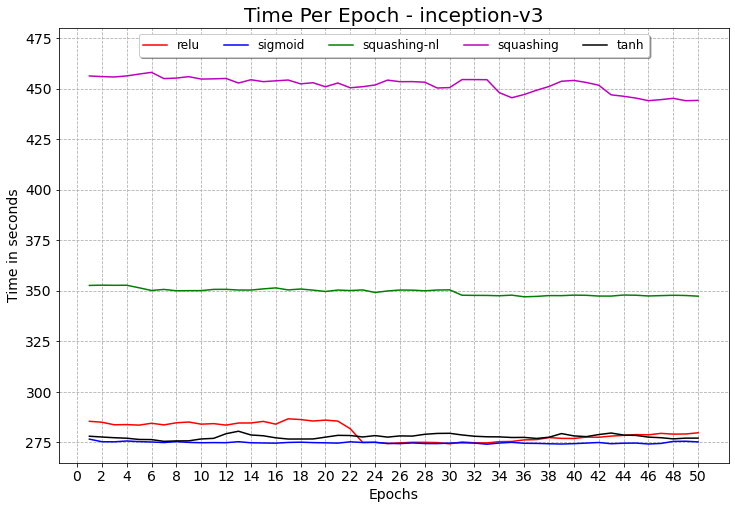

In [19]:
plt.figure(figsize=(12,8))

# Set colors for plot lines
colors_ = ['r','b','g','m','k']

# Loop over all files
for file, c in zip(fileNames, itertools.cycle(colors_)):
    
    ### Read .csv file and append to list
    model = pd.read_csv(PATH + file, index_col = 0)
    activation = file.split('_', 4)
    
    plt.plot(model['Epoch'], model['Time per epoch'],f'{c}-', label=f'{activation[2]}')
    #plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.xticks(np.arange(0, 51, step=2))
    
    #position of the legend outside of the graph
    plt.legend(bbox_to_anchor=(1, 1))

### Generate the plot
plt.title(f"Time Per Epoch - {fname}", fontsize=fs_title)

plt.xlabel("Epochs", fontsize=fs_label)
plt.xticks(fontsize=fs_label)
plt.ylabel("Time in seconds", fontsize=fs_label)
plt.yticks(fontsize=fs_label)
plt.ylim(top=480)

plt.grid(True, axis='both', linestyle='--')
plt.legend(loc='upper center', ncol=5, fancybox=True, shadow=True, fontsize=fs_legend)

plt.show()

## Plot Epoch:Beta

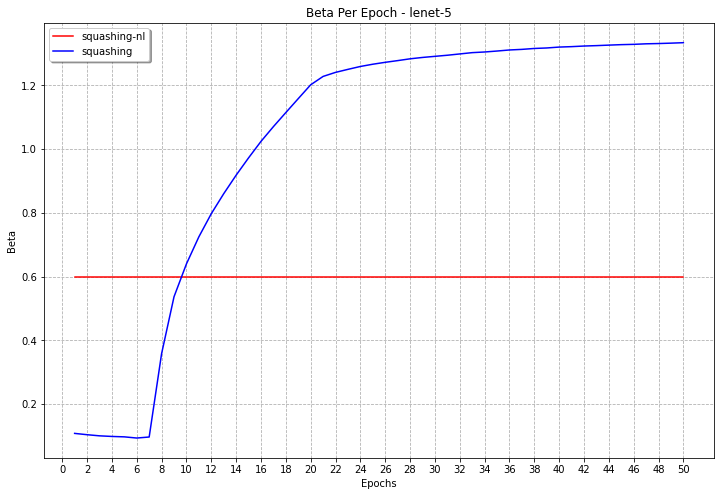

In [25]:
fileNames = [file for file in fileNames if f'_{fname}_' and ('squashing' or 'squashing-nl') in file]
plt.figure(figsize=(12,8))

# Set colors for plot lines
colors_ = ['r','b','g','m','k']

# Loop over all files
for file, c in zip(fileNames, itertools.cycle(colors_)):
    
    ### Read .csv file and append to list
    model = pd.read_csv(PATH + file, index_col = 0)
    activation = file.split('_', 4)
    
    plt.plot(model['Epoch'], model['Beta'],f'{c}-', label=f'{activation[2]}')
    #plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.xticks(np.arange(0, 52, step=2))


    #position of the legend outside of the graph
    plt.legend(bbox_to_anchor=(1, 1))

### Generate the plot
plt.title(f"Beta Per Epoch - {fname}", fontsize=fs_title)

plt.xlabel("Epochs", fontsize=fs_label)
plt.xticks(fontsize=fs_label)
plt.ylabel("Beta", fontsize=fs_label)
plt.yticks(fontsize=fs_label)

plt.grid(True, axis='both', linestyle='--')
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, fontsize=fs_legend)

plt.show()